In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/1-classcsv/Class.csv


Using Kaggle as environment and uploading data set on server
> # Name: Zain Raza

# Problem 1
#1

In [111]:
### Reading data. Quick Eyeball test at data
df = pd.read_csv('/kaggle/input/1-classcsv/Class.csv')
df.describe()

Unnamed: 0      Feat_0      Feat_1      Feat_2      Feat_3      Feat_4  \
count    800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     399.5000    2.036025   -0.040112    2.036025   -0.000296    1.624656   
std      231.0844    0.972176    1.030388    0.972176    0.973818    0.852103   
min        0.0000   -2.429392   -3.697867   -2.429392   -3.102857   -1.339233   
25%      199.7500    1.502539   -0.735816    1.502539   -0.686198    1.063066   
50%      399.5000    2.056189   -0.066938    2.056189   -0.033456    1.565545   
75%      599.2500    2.654883    0.709748    2.654883    0.669447    2.167681   
max      799.0000    4.981572    3.060549    4.981572    3.421899    4.444236   

           Feat_5      Feat_6      Feat_7      Feat_8  ...     Feat_11  \
count  800.000000  800.000000  800.000000  800.000000  ...  800.000000   
mean    -0.017580   -0.007111   -0.031844    0.032259  ...    2.036025   
std      1.007968    1.031877    0.999417    1.025203  ...    0.972176   
min     -3.662972   -3.937689   -3.209421   -1.860428  ...   -2.429392   
25%     -0.732787   -0.688868   -0.707224   -0.993391  ...    1.502539   
50%     -0.040287   -0.013366   -0.020291    0.819178  ...    2.056189   
75%      0.672302    0.656953    0.613540    1.002176  ...    2.654883   
max      2.851660    4.262463    4.250346    1.724640  ...    4.981572   

          Feat_12     Feat_13     Feat_14     Feat_15     Feat_16     Feat_17  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    -0.027891    1.537248    0.032259    1.537248   -0.439375    1.537248   
std      1.029470    1.120299    1.025203    1.120299    0.223866    1.120299   
min     -3.155541   -0.705378   -1.860428   -0.705378   -1.182464   -0.705378   
25%     -0.747802    0.639934   -0.993391    0.639934   -0.583653    0.639934   
50%     -0.090203    1.366628    0.819178    1.366628   -0.426271    1.366628   
75%      0.654824    2.427236    1.002176    2.427236   -0.294532    2.427236   
max      2.711115    4.789180    1.724640    4.789180    0.382150    4.789180   

          Feat_18     Feat_19      Labels  
count  800.000000  800.000000  800.000000  
mean    -1.851747   -0.016113    0.513750  
std      0.946209    1.028281    0.538678  
min     -4.449662   -3.120585    0.000000  
25%     -2.518331   -0.640937    0.000000  
50%     -1.908727   -0.038569    0.000000  
75%     -1.331998    0.681493    1.000000  
max      2.693109    4.186252    2.000000  

[8 rows x 22 columns]

No missing values. All counts are 800
Many similar values can be seen like Features 0,2 and 11, 14 and 8

In [112]:
df.head()

Unnamed: 0    Feat_0    Feat_1    Feat_2    Feat_3    Feat_4    Feat_5  \
0           0  3.231570 -1.184166  3.231570 -0.582928  2.986610  0.019922   
1           1  2.950646  0.628235  2.950646 -0.234752  1.846456 -1.703250   
2           2  1.525164 -0.173186  1.525164 -0.736633  0.940847 -1.897023   
3           3 -2.282110 -1.124825 -2.282110 -1.181351 -1.339233  1.123391   
4           4  2.349265  0.565790  2.349265 -1.276242  2.252749  1.624935   

     Feat_6    Feat_7    Feat_8  ...   Feat_11   Feat_12   Feat_13   Feat_14  \
0 -0.474994  0.534381  1.072125  ...  3.231570 -0.598195  3.333784  1.072125   
1 -1.382621  0.128240 -1.224577  ...  2.950646  0.461641  1.114697 -1.224577   
2  0.741471  0.726297 -0.666933  ...  1.525164 -1.970590  0.546444 -0.666933   
3  0.281333 -1.751498  1.169510  ... -2.282110  1.747488 -0.667424  1.169510   
4  0.609747 -0.982882  0.983517  ...  2.349265 -1.516599  2.602282  0.983517   

    Feat_15   Feat_16   Feat_17   Feat_18   Feat_19  Labels  
0  3.333784 -0.790798  3.333784 -2.659061 -0.028168       0  
1  1.114697 -0.520411  1.114697 -3.032291  0.488226       1  
2  0.546444 -0.265889  0.546444 -1.576680  0.293816       1  
3 -0.667424  0.382150 -0.667424  2.406254 -1.110234       2  
4  2.602282 -0.593567  2.602282 -1.877082  0.437991       0  

[5 rows x 22 columns]

**Feat_0 2,11 look exactly the same. Lets look at more features so we can drop and focus on the ones that remain later**

# 1 (a) Outliers
Plotting a Boxplot is a quick way to show us the outliers

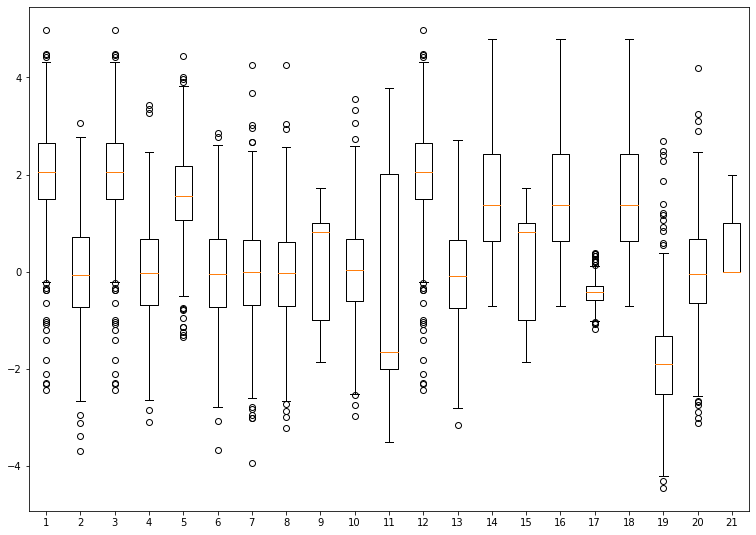

In [113]:
df=df.drop(['Unnamed: 0'],axis=1) ## Dropping Unnamed: 0, looks like a serial number
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(df)
plt.show()

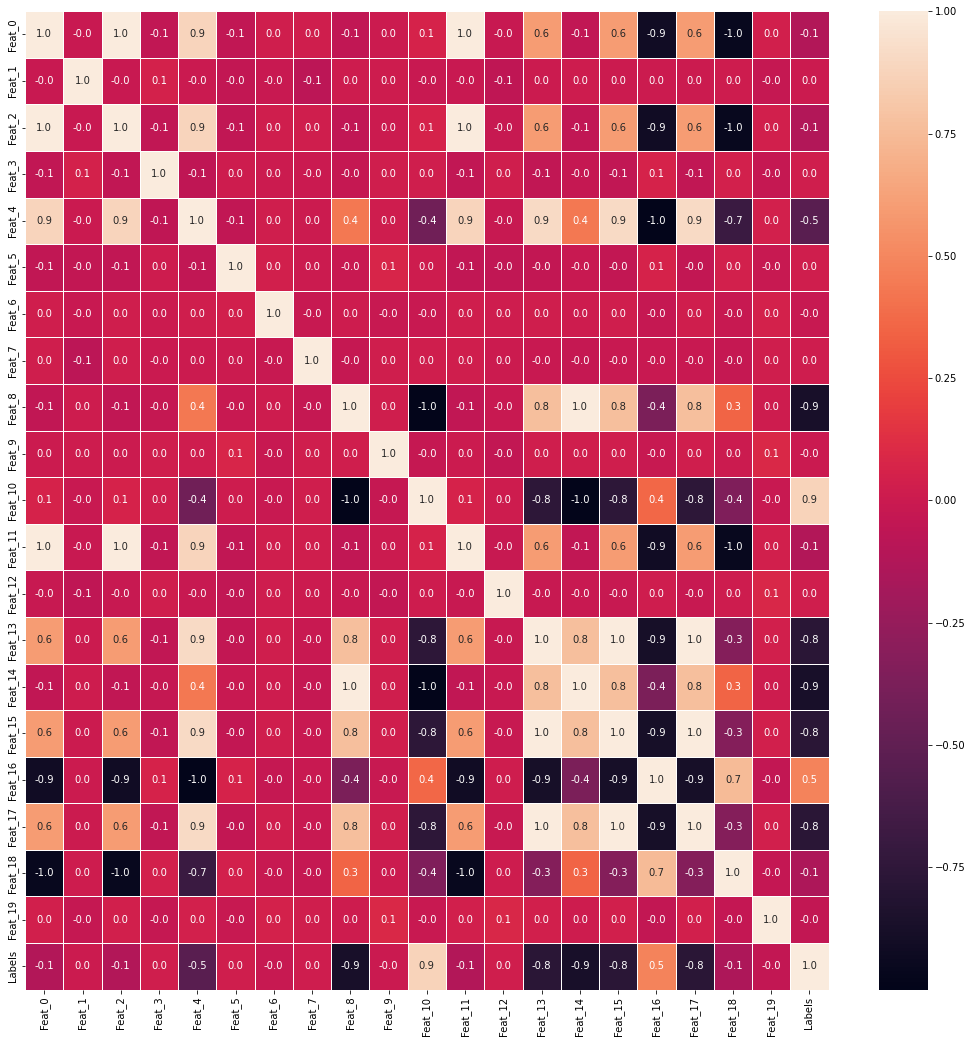

In [114]:
##Making a correlation plot
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# 1 (b) Uninformative features  (c) Redundant Features d) Imbalance 

#Drop all redundant features which have correlation of 1.0 with others and keeping a single out of the group.
Dropping Features:
0,2 due to 11
8 due to 14
13,15 due to 17
Leaving corr with -1.0 for now

In [115]:
###Dropping redundant features
df=df.drop(['Feat_0','Feat_2','Feat_8','Feat_13','Feat_15'],axis=1)
##Reruning the above correlatoin plot and recheck and drop more if needed

# Plotting a pairplot gives an analysis on the above 3  at the same time
(b) Uninformative features  (c) Redundant Features and d) Imbalance

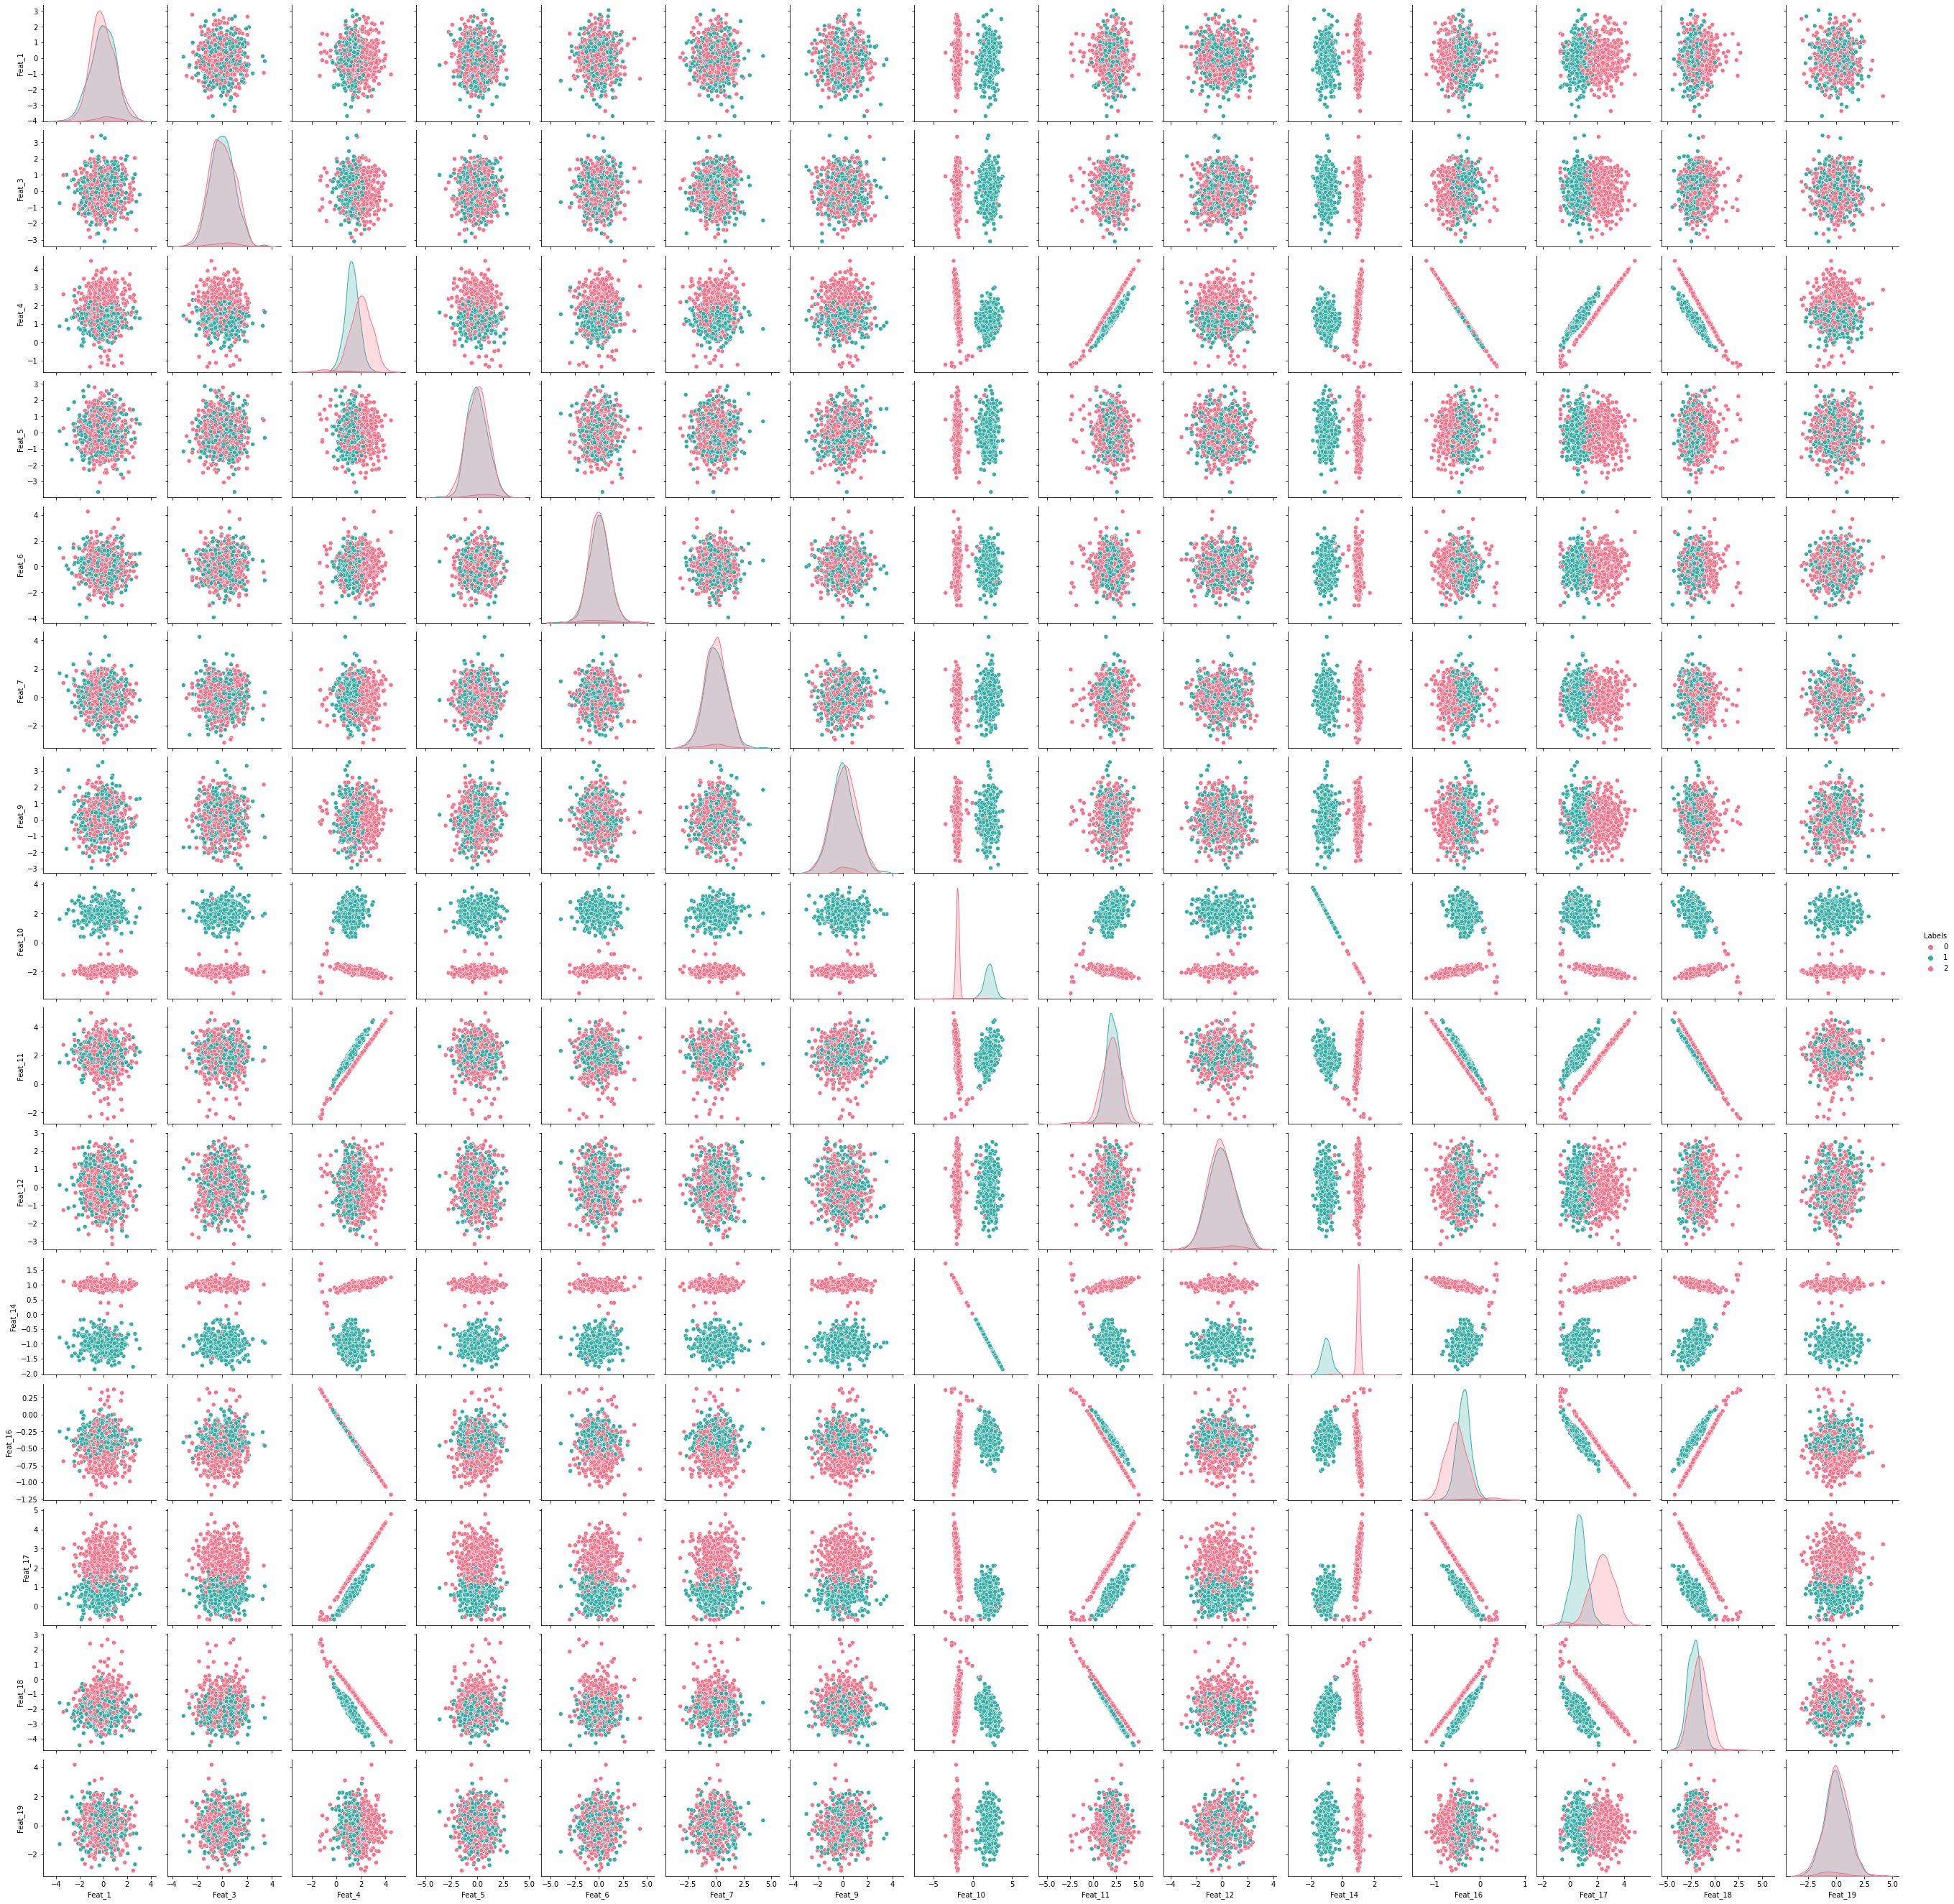

In [116]:
##Putting a scatter plot to see potential outliers 
#and potential for features as we saw some features like Feat_17 highly correlated with Label
g = sns.pairplot(df, hue="Labels", palette="husl")
plt.show()

##### The data set is roughly balanced as we can see from the univariate plot in the diagonal
##### WE can however see that the Label '2' is a small minority and our model might suffer predicting 2
# only Feat_10 and Feat_14 seem to be imbalanced however they are informative
**# Uniformative features are :
*** 1,3,5,6,7,8,9,12,19

**# Informative features are :
*** 4,10,14,16,17,18

# We can observe that most features that we have left, we can build a good model to classify Label

In [117]:
## Next we can drop the outliers and optionally repeat the above analysis to see if that helped

In [118]:
###Using the Standard Deviation Method to remove Outliers
df=df[(np.abs(stats.zscore(df)) < 2).any(axis=1)]

In [119]:
df.describe()

Feat_1      Feat_3      Feat_4      Feat_5      Feat_6      Feat_7  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    -0.040112   -0.000296    1.624656   -0.017580   -0.007111   -0.031844   
std      1.030388    0.973818    0.852103    1.007968    1.031877    0.999417   
min     -3.697867   -3.102857   -1.339233   -3.662972   -3.937689   -3.209421   
25%     -0.735816   -0.686198    1.063066   -0.732787   -0.688868   -0.707224   
50%     -0.066938   -0.033456    1.565545   -0.040287   -0.013366   -0.020291   
75%      0.709748    0.669447    2.167681    0.672302    0.656953    0.613540   
max      3.060549    3.421899    4.444236    2.851660    4.262463    4.250346   

           Feat_9     Feat_10     Feat_11     Feat_12     Feat_14     Feat_16  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     0.051992   -0.042689    2.036025   -0.027891    0.032259   -0.439375   
std      0.993201    2.065117    0.972176    1.029470    1.025203    0.223866   
min     -2.967970   -3.499588   -2.429392   -3.155541   -1.860428   -1.182464   
25%     -0.605853   -1.998327    1.502539   -0.747802   -0.993391   -0.583653   
50%      0.039517   -1.643355    2.056189   -0.090203    0.819178   -0.426271   
75%      0.683329    2.021576    2.654883    0.654824    1.002176   -0.294532   
max      3.545051    3.780225    4.981572    2.711115    1.724640    0.382150   

          Feat_17     Feat_18     Feat_19      Labels  
count  800.000000  800.000000  800.000000  800.000000  
mean     1.537248   -1.851747   -0.016113    0.513750  
std      1.120299    0.946209    1.028281    0.538678  
min     -0.705378   -4.449662   -3.120585    0.000000  
25%      0.639934   -2.518331   -0.640937    0.000000  
50%      1.366628   -1.908727   -0.038569    0.000000  
75%      2.427236   -1.331998    0.681493    1.000000  
max      4.789180    2.693109    4.186252    2.000000

# No feature has values above 3 STD se we can try the IQR method
**Removing values which are greate than 1.5 * IQR of eaither side of the Quartiles**

In [120]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [121]:
df1.describe()

Feat_1      Feat_3      Feat_4      Feat_5      Feat_6      Feat_7  \
count  733.000000  733.000000  733.000000  733.000000  733.000000  733.000000   
mean    -0.023256   -0.016679    1.657680   -0.034228   -0.030627   -0.034896   
std      1.004581    0.941973    0.777422    0.976854    0.961317    0.954922   
min     -2.659520   -2.650662   -0.282148   -2.790865   -2.591493   -2.652766   
25%     -0.715718   -0.684883    1.076713   -0.762522   -0.693719   -0.711130   
50%     -0.058936   -0.053874    1.573444   -0.058398   -0.037966   -0.026090   
75%      0.716936    0.645904    2.178309    0.637876    0.630377    0.607995   
max      2.782128    2.457437    3.822905    2.611594    2.484334    2.565002   

           Feat_9     Feat_10     Feat_11     Feat_12     Feat_14     Feat_16  \
count  733.000000  733.000000  733.000000  733.000000  733.000000  733.000000   
mean     0.040530   -0.029335    2.080967   -0.044279    0.025871   -0.448423   
std      0.951002    2.070873    0.841922    1.030391    1.028278    0.202202   
min     -2.514388   -2.454601   -0.201583   -2.797958   -1.860428   -1.015658   
25%     -0.605580   -1.997221    1.519504   -0.753975   -1.001727   -0.584177   
50%      0.038974   -1.675658    2.067195   -0.106293    0.836269   -0.432522   
75%      0.681268    2.036728    2.654519    0.630076    1.000858   -0.300422   
max      2.597119    3.780225    4.240030    2.711115    1.239868    0.069074   

          Feat_17     Feat_18     Feat_19      Labels  
count  733.000000  733.000000  733.000000  733.000000  
mean     1.564964   -1.894568    0.001686    0.492497  
std      1.087273    0.823621    0.979545    0.513757  
min     -0.682021   -3.861027   -2.564131    0.000000  
25%      0.661729   -2.516727   -0.607638    0.000000  
50%      1.423038   -1.914111   -0.026469    0.000000  
75%      2.435352   -1.364405    0.684840    1.000000  
max      4.199250    0.385594    2.466753    2.000000

# Repeat the Box and pairplot to see the the data to see improvement

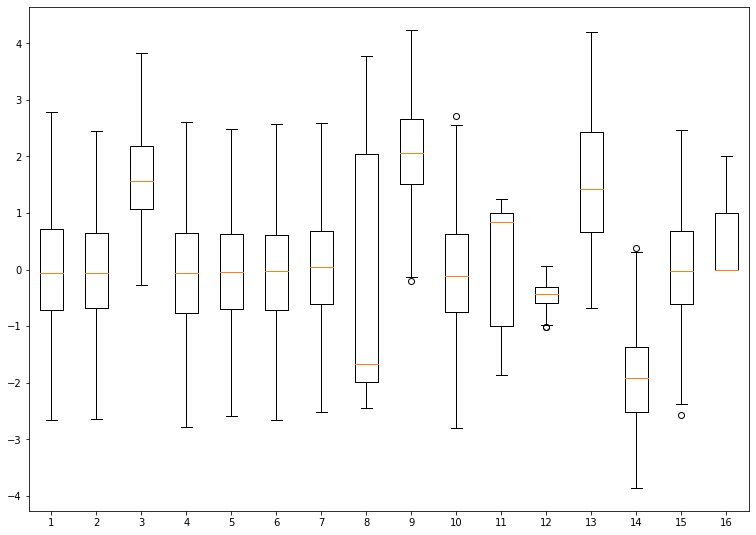

In [122]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(df1)
plt.show()

## 2) Visualising the relationship between the informative features can also be achived by the pairplot for the selected features above

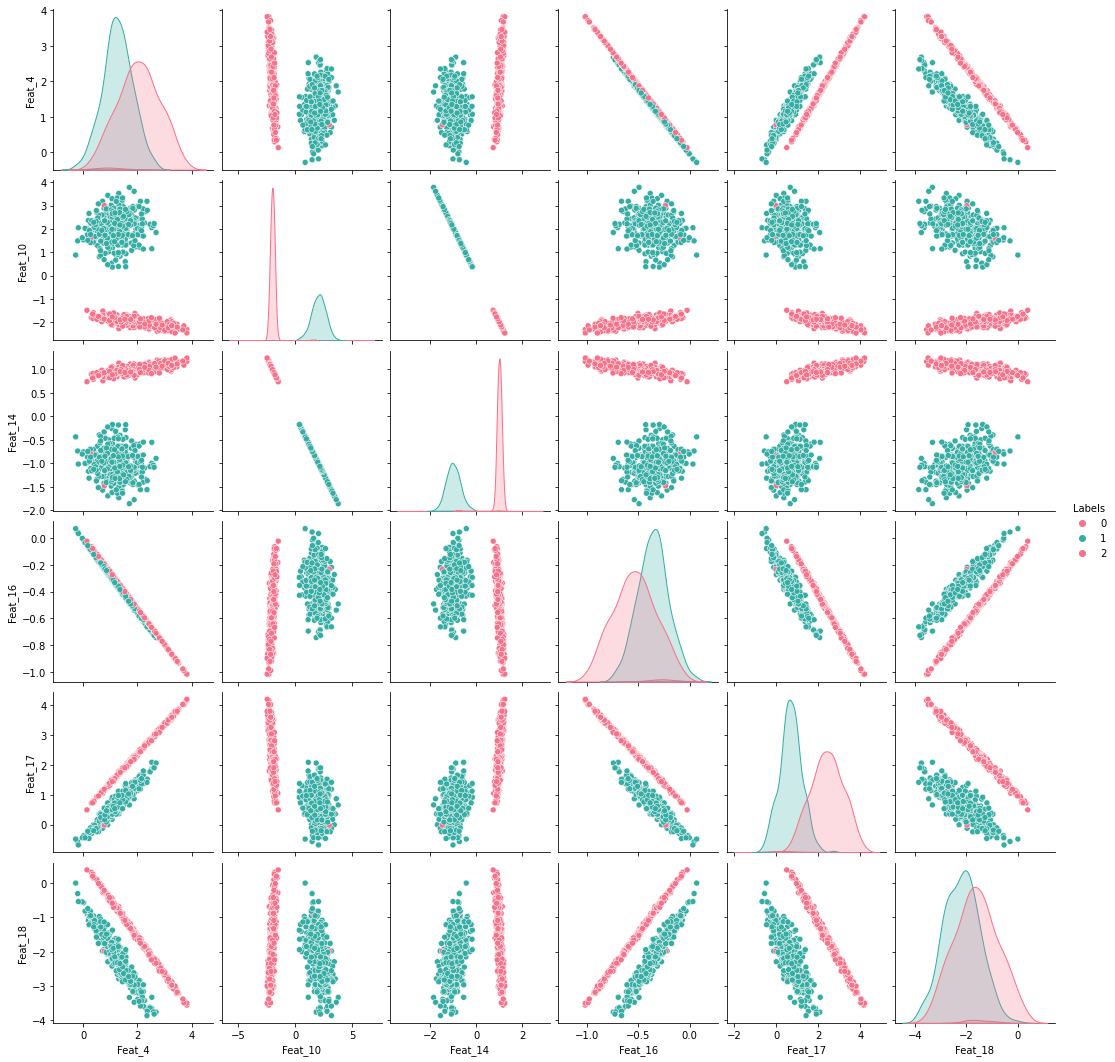

In [123]:
g = sns.pairplot(df1[['Feat_4','Feat_10','Feat_14','Feat_16','Feat_17','Feat_18','Labels']], hue="Labels", palette="husl")
plt.show()

### 3 Training a classifer
# As we have already cleaned our data set from outliers and anamolies, uniformative features. We are going to use 5 features to build a model

In [124]:
# Assigning Features X and Labels Y
X = df[['Feat_4','Feat_10','Feat_14','Feat_16','Feat_17','Feat_18']]
y = df['Labels']

In [125]:
## Setting a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
# Training the binary classifier using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [127]:
# Predicting on the test data
y_pred = model.predict(X_test)

# 4) predictive accuracy of the trained classifier


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       0.98      1.00      0.99        88
           2       1.00      0.40      0.57         5

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.85       200
weighted avg       0.99      0.98      0.98       200



# 5) Modify the classifier based on the cost structure mentioned in the cost structure

In [131]:
# Training the binary classifier using Logistic Regression
model_1 = LogisticRegression(class_weight={0:1000,1:1000,2:1})
model_1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1000, 1: 1000, 2: 1})

In [132]:
# Predicting on the test data with the class weights
y_pred = model_1.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       0.98      1.00      0.99        88
           2       0.00      0.00      0.00         5

    accuracy                           0.97       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.95      0.97      0.96       200

